<a href="https://colab.research.google.com/github/anu3200/Assignment/blob/main/Project_HR_Salary_Dashboard_Train_the_Dataset_and_Predict_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [38]:
Data= pd.read_csv('/content/salarydata (2).csv')
Data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Overview**

In [39]:
# take an overview look at the data
Data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [41]:
from pandas.core.window.rolling import DataError
# Total number of records
n_records = Data.shape[0]

# Total number of features
n_features = Data.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = Data[Data['salary'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = Data[Data['salary'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32561
Total number of features: 14
Individuals making more than $50k: 0
Individuals making at most $50k: 0
Percentage of individuals making more than $50k: 0.00%


**Data Cleaning**

In [42]:
# drop uneeded columns
Data.drop('education', inplace=True, axis=1)
Data.columns.tolist()

['age',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']



*   
We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.
The matching education level of the education number:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate





In [43]:
# check for nulls
# check for nulls
Data.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


* It appears that there are no null values occurred in the dataset.





In [44]:
# check duplicates and remove it
print("Before removing duplicates:", Data.duplicated().sum())

cens = Data[~Data.duplicated()]

print("After removing duplicates:", cens.duplicated().sum())

Before removing duplicates: 3465
After removing duplicates: 0






*   There are 3465 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.





In [45]:
# before discarding
Data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [46]:
# discard spaces from entries
columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']
for column in columns:
    Data[column] = Data[column].str.strip()

In [47]:
# after discarding
Data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64



*   Discarding the spaces from the entries of the dataset, for easier access.



In [48]:
# before changing "?"
Data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [49]:
# changing "?" to Unknown
change_columns = ['workclass', 'occupation', 'native-country']
for column in change_columns:
        Data[column] = Data[column].replace({'?': 'Unknown'})

In [50]:
# after changing "?"
Data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64





*   Changing "?" symbol to "Unknown", for better interpretation and cleaner representation.



**Data Exploration**

In [51]:
# a quick look on some statistics about the data
Data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


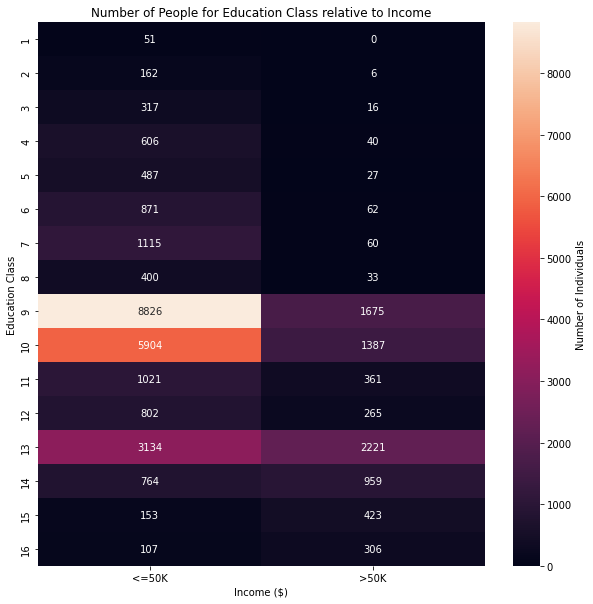

In [52]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = Data.groupby(['education-num','salary']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education-num', columns = 'salary', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');



*   In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

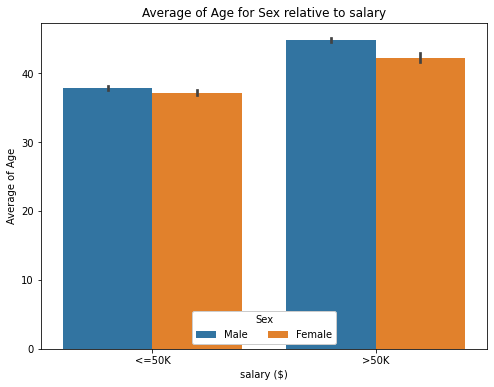

In [53]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = cens, x = 'salary', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to salary')
plt.xlabel('salary ($)')
plt.ylabel('Average of Age');



*   The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.



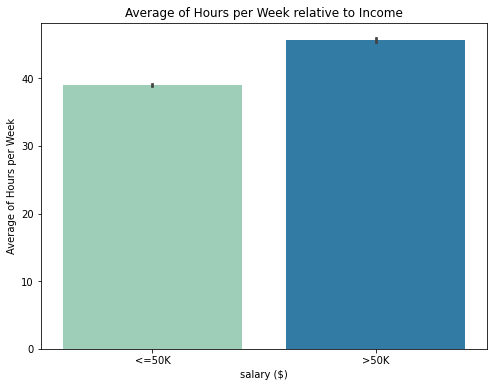

In [54]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=cens, x='salary', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('salary ($)')
plt.ylabel('Average of Hours per Week');



*   We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.



**Data Preprocessing**

In [55]:
Data_prep = Data.copy()



*   We have taken a copy of the dataset to maintain the cleaned one for later uses, and to use the copied one for preparing the data for the model.



In [56]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  salary          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [57]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = MinMaxScaler()
Data_prep[numerical] = scaler.fit_transform(Data_prep[numerical])

In [58]:
Data_prep.sample(3)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
28115,0.178082,State-gov,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,0.397959,United-States,>50K
24623,0.082192,Private,10,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,0.142857,United-States,<=50K
10525,0.082192,Private,13,Never-married,Other-service,Own-child,White,Female,0.0,0.0,0.244898,United-States,<=50K




*   The data has been scaled to MinMaxScalling for numerical features, which converts the data to have a range between 0 and 1. That would help to make the data well-prepared for the model.



In [59]:
# Encoding
Data_prep['sex'] = Data_prep.sex.replace({"Female": 0, "Male": 1})
Data_prep['salary'] = Data_prep.salary.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
Data_prep = pd.get_dummies(Data_prep)

In [60]:
encoded = list(Data_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

91 total features after one-hot encoding.




*  We have encoded and created dummy variables using the hot-encoding approach for the categorical features, to make it as numerical data. It helps for easier processing and more numerical representation.



In the project, the independent variables have been chosen as follows:



*   Age

*   Workclass

*   Education-num
*   Marital-status


*   Occupation


*   Relationship
*   Race

*   Sex
*   Capital-gain

*   Capital-loss
*   Hours-per-week

*   Native-country











Also, the Salary variable is considered to be the dependent variable, since it is our concern in this experiment.

In [61]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [62]:
# Partioning the data
X = Data_prep.drop('salary', axis=1)
y = Data_prep['salary']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [64]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8500890759481541 | test:  0.8488376016819131
F1-score: train:  0.6570989910639072 | test:  0.6546632640940024
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9789088182939676 | test:  0.8492367844164251
F1-score: train:  0.9557611974314273 | test:  0.6659163738764036
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8608304496048508 | test:  0.8593410844159347
F1-score: train:  0.6782479164434043 | test:  0.6747018870638046
---------------------------------------------------------




*   
As it appears from the exploration in our dataset that there is an imbalance between the classes of classifications. Since the individuals making more than 50k as income represent 75% of the data. So, we would try to make oversampling.



In [65]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [66]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9790453074433657 | test:  0.9213996763754044
F1-score: train:  0.9792905415702808 | test:  0.9251783841216668


**Models Definitions:**
**Logistic regression,** despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

**A Random forest**   is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**An AdaBoost classifie**r  is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**Conclusions**


**Features Importance**

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
Data_conc = Data.copy()

In [69]:
for col in Data_conc.columns:
    if Data_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        Data_conc[col] = encoder.fit_transform(Data_conc[col])

In [70]:
# Partioning the data
Xc = Data_conc.drop('salary', axis=1)
yc = Data_conc['salary']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [71]:
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,age,21.378756
1,workclass,5.065037
2,education-num,14.012579
3,marital-status,7.163024
4,occupation,8.641953
5,relationship,10.902176
6,race,1.782007
7,sex,1.435996
8,capital-gain,12.418233
9,capital-loss,3.962912


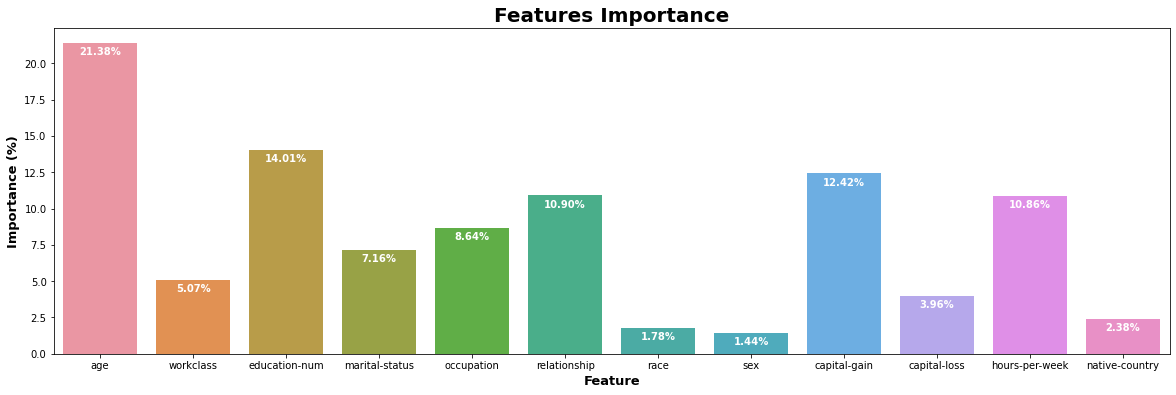

In [72]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')



*   We plan to drop the features that have less than 4% importance, to speed up the process of fitting the model. Since without them, it would provide the same results of the evaluation.

